## Calculating Out of Sample Performance

In [2]:
import warnings
warnings.filterwarnings('ignore')
import scanpy as sc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import glob, os
import matplotlib
import re
import vae_hcv
import shutil

Using TensorFlow backend.


In [3]:
os.chdir("/home/icb/harshita.agarwala/")
#adata = sc.read("./dentate_gyrus_normalized.h5ad")
#cells = list(set(adata.obs["clusters"]))

adata = sc.read("./kang_seurat_normalized.h5ad")
cells = list(set(adata.obs["cell_type"]))
print(cells)

['CD14 Mono', 'pDC', 'Mk', 'CD16 Mono', 'B', 'DC', 'CD4 Memory T', 'T activated', 'CD4 Naive T', 'B Activated', 'NK', 'CD8 T']


In [14]:
os.chdir("/storage/groups/ml01/workspace/harshita.agarwala/")
#os.chdir("/home/icb/harshita.agarwala/")
path_folder = r'./models_seurat_leave_one'
df_avg = pd.DataFrame()

folders = os.listdir(path=path_folder)
for folder_name in folders:
    try:
        #print(folder_name)
        df = pd.read_csv(path_folder+"/"+folder_name+"/gene_heatmaps/reg_mean.csv")
        avg = df.r_sq_100.mean()
        cell_considered = [string for string in cells if string in folder_name]
        cell = max(cell_considered,key=len)
        text = '_'.join(folder_name.split('_')[0:3])
        #print(text)
        row = list([avg,text,cell])
        df_temp = pd.DataFrame([row])
        df_avg = pd.concat([df_avg,df_temp])
    except:
        pass
df_avg.reset_index(inplace=True,drop=True)
df_avg.rename(columns={0:"r_sq_100",1: "folder_name",2:"cell"},inplace=True)

In [16]:
df_avg
df_avg.groupby("folder_name")["r_sq_100"].mean()

folder_name
latent5_alpha100_c30     0.637739
latent5_alpha100_c500    0.791944
latent5_alpha20_c30      0.658865
latent5_alpha20_c500     0.659129
latent5_alpha5_c30       0.514313
Name: r_sq_100, dtype: float64

In [17]:
os.chdir("/storage/groups/ml01/workspace/harshita.agarwala/")
#os.chdir("/home/icb/harshita.agarwala/")
path_folder = r'./models_seurat_leave_one'
df_full = pd.DataFrame(columns = ["name","r_sq_all","r_sq_100","folder_name","cell"])

folders = os.listdir(path=path_folder)
for folder_name in folders:
    #print(folder_name)
    try:
        df = pd.read_csv(path_folder+"/"+folder_name+"/gene_heatmaps/reg_mean.csv")
        #print(df)
        high = df[df.r_sq_100 == df.r_sq_100.max()]
        #print(high)
        text = '_'.join(folder_name.split('_')[0:3])
        #print(text)
        high["folder_name"] = text
        cell_considered = [string for string in cells if string in folder_name]
        #print(cell_considered)
        high["cell"] = max(cell_considered,key=len)
        #print(high["cell"])
        df_full = pd.concat([df_full,high])
        #print(df_full)
    except:
        pass
df_full.reset_index(inplace=True,drop=True)

In [21]:
df_full
max_dataframe = df_full[df_full["folder_name"]=="latent5_alpha100_c500"]

In [19]:
sns.set(font_scale=1)
sns.set_style("darkgrid")

In [22]:
max_dataframe["type"] = "max"
df_temp = df_avg[df_avg["folder_name"]=="latent5_alpha100_c500"]
df_temp["type"] = "avg"
full_df = pd.concat([max_dataframe,df_temp])
full_df

,name,r_sq_all,r_sq_100,folder_name,cell,type
7,B_2,0.990629,0.995951,latent5_alpha100_c500,CD4 Naive T,max
10,DC_2,0.959045,0.937732,latent5_alpha100_c500,CD14 Mono,max
12,CD14 Mono_0,0.885240,0.832483,latent5_alpha100_c500,DC,max
13,CD14 Mono_0,0.724332,0.928455,latent5_alpha100_c500,B Activated,max
23,CD4 Naive T_0,0.914816,0.983033,latent5_alpha100_c500,CD4 Memory T,max
24,NK_0,0.903698,0.949869,latent5_alpha100_c500,Mk,max
25,pDC_0,0.830465,0.815100,latent5_alpha100_c500,NK,max
41,NK_3,0.844232,0.970422,latent5_alpha100_c500,CD8 T,max
48,NK_0,0.757449,0.769455,latent5_alpha100_c500,CD16 Mono,max
52,pDC_1,0.925074,0.956311,latent5_alpha100_c500,T activated,max


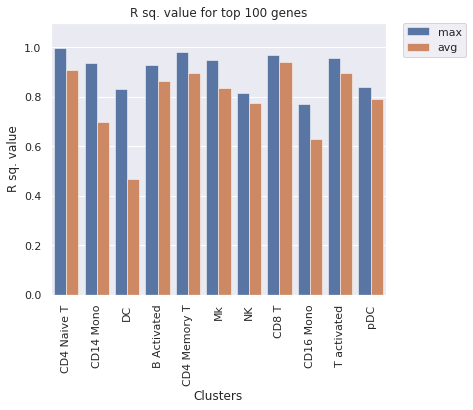

In [23]:

fig, ax = plt.subplots(figsize=(6,5))

sns.barplot(x="cell", y="r_sq_100", hue="type", data=full_df,linewidth=0.5)

plt.xlabel('Clusters')
plt.ylabel('R sq. value')
plt.xticks(rotation=90)
plt.ylim([0,1.1])
plt.title('R sq. value for top 100 genes')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.savefig("OUT_Seurat_hcv.png", bbox_inches='tight',dpi=150)